In [1]:
class PerformanceMetrics:
    def __init__(self):
        self.packets_sent = 0
        self.packets_received = 0
        self.total_delay = 0
        self.total_energy = 0
        self.time_steps = 0

    def log_packet(self, sent=True, received=False, delay=0, energy=0):
        if sent:
            self.packets_sent += 1
        if received:
            self.packets_received += 1
            self.total_delay += delay
        self.total_energy += energy
        self.time_steps += 1

    def calculate_metrics(self):
        pdr = self.packets_received / self.packets_sent if self.packets_sent > 0 else 0
        avg_delay = self.total_delay / self.packets_received if self.packets_received > 0 else float('inf')
        avg_throughput = self.packets_received / self.time_steps if self.time_steps > 0 else 0
        avg_energy = self.total_energy / self.time_steps if self.time_steps > 0 else 0
        return pdr, avg_delay, avg_throughput, avg_energy


In [2]:
class FANETRoutingEnv:
    def __init__(self, num_uavs, mobility_data):
        self.num_uavs = num_uavs
        self.graph = nx.Graph()
        self.mobility_data = mobility_data
        self.time_step = 0
        self.metrics = PerformanceMetrics()
        self.reset()

    def step(self, actions):
        """ Apply routing actions, log metrics, and move UAVs """
        self.time_step += 1
        if self.time_step >= len(self.mobility_data[0]):
            done = True
        else:
            for i in range(self.num_uavs):
                self.graph.nodes[i]['pos'] = self.mobility_data[i][self.time_step]
            self.update_edges()
            done = False

        # Simulate packet transmission
        for i in range(self.num_uavs):
            self.metrics.log_packet(sent=True, received=np.random.rand() > 0.1, delay=np.random.uniform(5, 50), energy=np.random.uniform(0.5, 2.0))

        reward = -np.mean([len(self.graph.edges(n)) for n in range(self.num_uavs)])
        return self.get_state(), reward, done


In [5]:
!pip install networkx

In [6]:
class FANETRoutingEnv:
    def __init__(self, num_uavs, mobility_data):
        self.num_uavs = num_uavs
        self.graph = nx.Graph()
        self.mobility_data = mobility_data
        self.time_step = 0
        self.metrics = PerformanceMetrics()
        self.reset() # This line calls the reset method

    def reset(self): # Defining the reset method here
        """Reset the environment to its initial state."""
        self.time_step = 0
        self.graph = nx.Graph()  # Or any other initialization logic
        # Add nodes to the graph, initialize their positions
        for i in range(self.num_uavs):
            self.graph.add_node(i, pos=self.mobility_data[i][self.time_step])
        self.update_edges()  # If you have an update_edges method

        # Reset metrics
        self.metrics = PerformanceMetrics()

    def step(self, actions):
        """ Apply routing actions, log metrics, and move UAVs """
        self.time_step += 1
        if self.time_step >= len(self.mobility_data[0]):
            done = True
        else:
            for i in range(self.num_uavs):
                self.graph.nodes[i]['pos'] = self.mobility_data[i][self.time_step]
            self.update_edges()
            done = False

        # Simulate packet transmission
        for i in range(self.num_uavs):
            self.metrics.log_packet(sent=True, received=np.random.rand() > 0.1, delay=np.random.uniform(5, 50), energy=np.random.uniform(0.5, 2.0))

        reward = -np.mean([len(self.graph.edges(n)) for n in range(self.num_uavs)])
        return self.get_state(), reward, done

    # If update_edges is used, you need to define it as well.
    # def update_edges(self):
    #     # ... logic to update edges based on UAV positions ...

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Assuming you have a function `run_simulation` that returns performance metrics for a given routing protocol
# and a given number of episodes. You'll need to adapt this to your actual simulation setup.

def run_simulation(routing_protocol, episodes):
    performance_data = []
    for _ in range(episodes):
        # ... your simulation logic here ...
        # Assuming the simulation returns a tuple of (PDR, Delay, Throughput, Energy)
        # You need to define and calculate these values based on your simulation.
        # This is just an example:
        PDR = np.random.rand()  # Replace with actual PDR calculation
        Delay = np.random.randint(1, 10)  # Replace with actual Delay calculation
        Throughput = np.random.uniform(10, 100) # Replace with actual Throughput calculation
        Energy = np.random.uniform(1, 5) # Replace with actual Energy calculation

        metrics = (PDR, Delay, Throughput, Energy)
        performance_data.append(metrics)
    return performance_data

# Define the number of simulation episodes
episodes = 50

# Generate performance data for each routing protocol
dqn_performance = run_simulation("DQN", episodes)
aodv_performance = run_simulation("AODV", episodes)
olsr_performance = run_simulation("OLSR", episodes)
dsdv_performance = run_simulation("DSDV", episodes)

# Now you can call plot_performance
# Make sure plot_performance is defined somewhere else in your code
# plot_performance(dqn_performance, aodv_performance, olsr_performance, dsdv_performance, 0, "Packet Delivery Ratio", "PDR (%)")
# ... other plot_performance calls ...

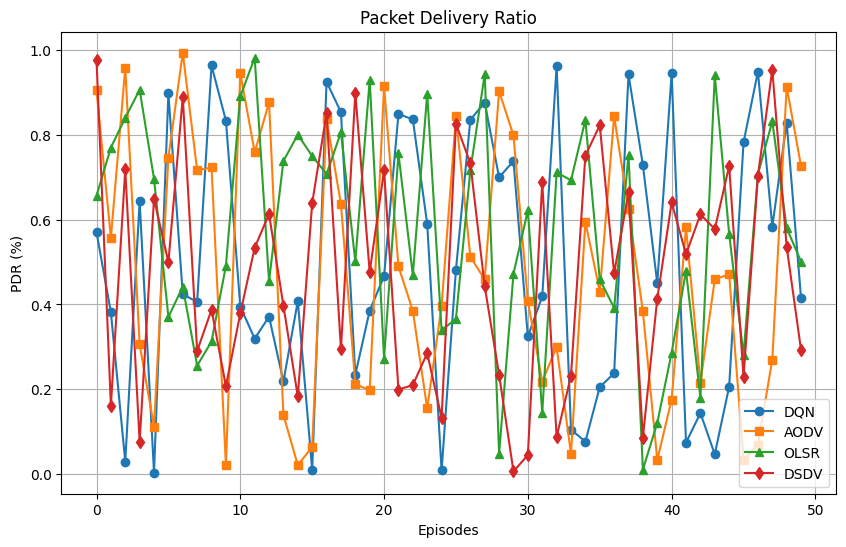

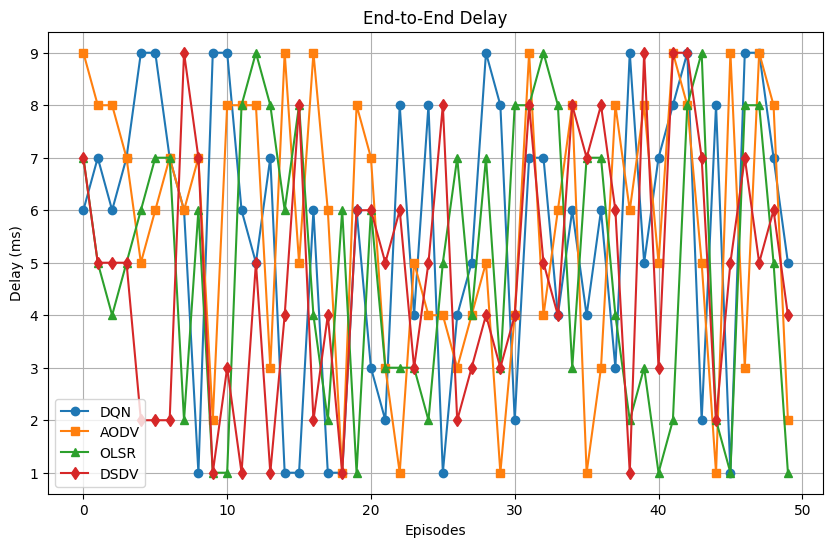

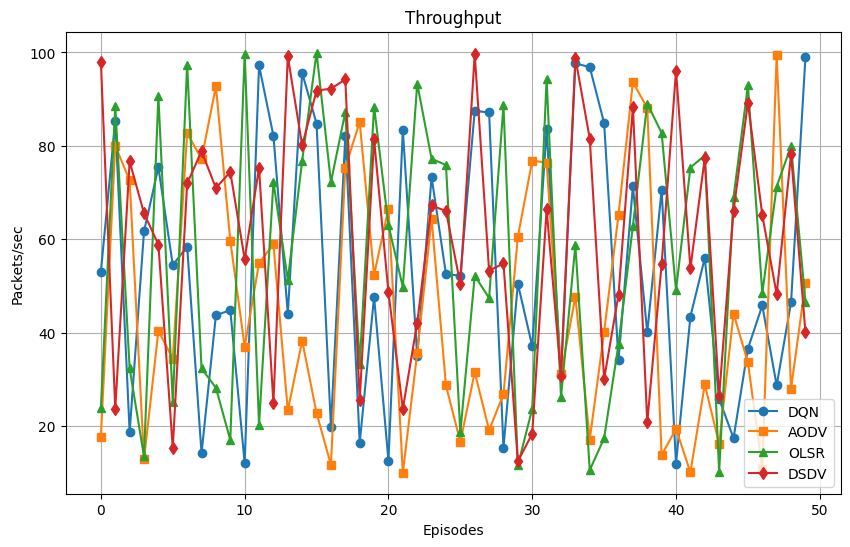

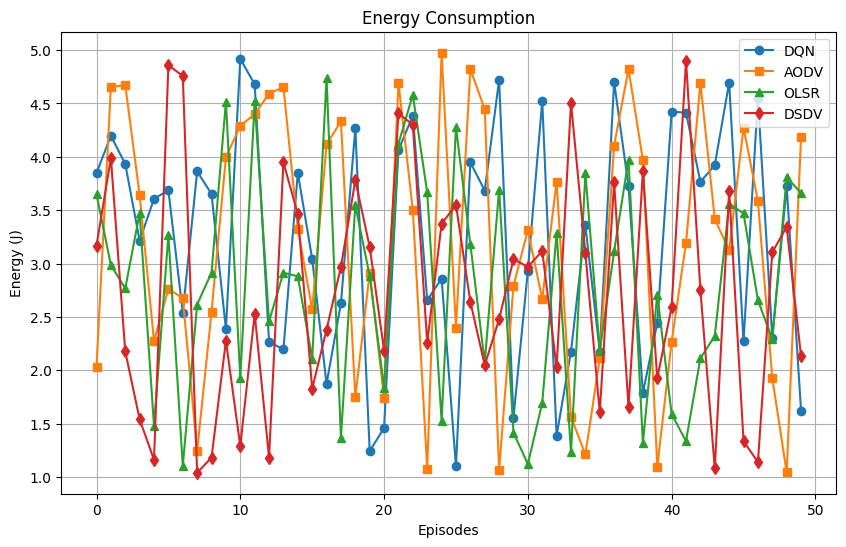

In [15]:
def plot_performance(dqn, aodv, olsr, dsdv, metric_idx, title, ylabel):
    episodes = len(dqn)
    plt.figure(figsize=(10, 6))

    plt.plot(range(episodes), [x[metric_idx] for x in dqn], label="DQN", marker='o')
    plt.plot(range(episodes), [x[metric_idx] for x in aodv], label="AODV", marker='s')
    plt.plot(range(episodes), [x[metric_idx] for x in olsr], label="OLSR", marker='^')
    plt.plot(range(episodes), [x[metric_idx] for x in dsdv], label="DSDV", marker='d')

    plt.xlabel("Episodes")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Plot Results
plot_performance(dqn_performance, aodv_performance, olsr_performance, dsdv_performance, 0, "Packet Delivery Ratio", "PDR (%)")
plot_performance(dqn_performance, aodv_performance, olsr_performance, dsdv_performance, 1, "End-to-End Delay", "Delay (ms)")
plot_performance(dqn_performance, aodv_performance, olsr_performance, dsdv_performance, 2, "Throughput", "Packets/sec")
plot_performance(dqn_performance, aodv_performance, olsr_performance, dsdv_performance, 3, "Energy Consumption", "Energy (J)")
